<a href="https://colab.research.google.com/github/davyandr/pet-projects/blob/main/vehicles/bmw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ поддержанных автомобилей марки BMW

## Выводы:


*   Больше всего кабриолетов продают в мае - перед летним сезоном
*   Популярные кузова: универсал, седан, кроссовер
*   Самый популярный вид топлива: дизель
*   Популярные цвета: черный, серый, синий
*   Средний пробег: 141 т. км
*   Средний возраст: 6 лет
*   Средняя мощность: 129 лс
*   На цену авто влияют пробег и возраст
*   С каждым годом новые автомобили становятся мощнее



# Импорт

In [1]:
! gdown 1yeEN2VnULs57K21P-URUoysEQdIpWEKE

Downloading...
From: https://drive.google.com/uc?id=1yeEN2VnULs57K21P-URUoysEQdIpWEKE
To: /content/bmw_pricing_challenge.csv
100% 603k/603k [00:00<00:00, 28.1MB/s]


https://drive.google.com/file/d/1yeEN2VnULs57K21P-URUoysEQdIpWEKE/view?usp=sharing

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as ss
import warnings
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('/content/bmw_pricing_challenge.csv')
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [17]:
df.registration_date = pd.to_datetime(df.registration_date)
df.sold_at = pd.to_datetime(df.sold_at)

In [24]:
df.shape

(4843, 18)

In [30]:
df['years'] = df.sold_at.apply(lambda x: x.year) - df.registration_date.apply(lambda x: x.year)

In [34]:
df['days'] = (df.sold_at - df.registration_date).dt.days

In [41]:
df.mileage = np.abs(df.mileage)

In [43]:
df['km_per_day'] = df.mileage / df.days

## Популярные типы кузовов, виды топлива, цвета

In [7]:
df.car_type.value_counts()

estate         1606
sedan          1168
suv            1058
hatchback       699
subcompact      117
coupe           104
convertible      47
van              44
Name: car_type, dtype: int64

In [26]:
df.fuel.value_counts()

diesel           4641
petrol            191
hybrid_petrol       8
electro             3
Name: fuel, dtype: int64

In [27]:
df.paint_color.value_counts()

black     1633
grey      1175
blue       710
white      538
brown      341
silver     329
red         52
beige       41
green       18
orange       6
Name: paint_color, dtype: int64

## Средний пробег, средний возраст и средняя мощность авто

Avg mileage: 140963km


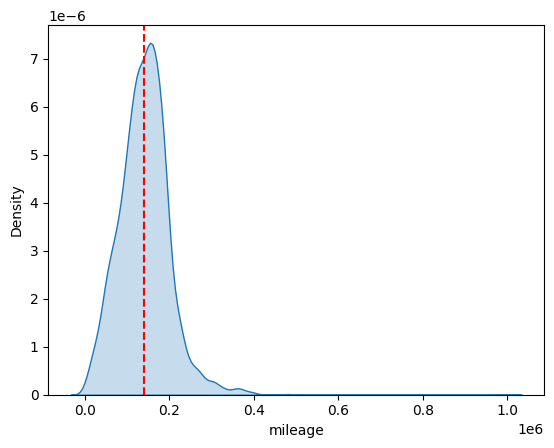

In [58]:
print('Avg mileage: ' + str(round(df.mileage.mean())) + 'km')
ax = sns.kdeplot(data=df, x='mileage', fill=True)
ax.axvline(x = df.mileage.mean(),
           ymin = 0,
           ymax = 1,
           linestyle = "dashed",
           color='red');

Avg age: 6 years


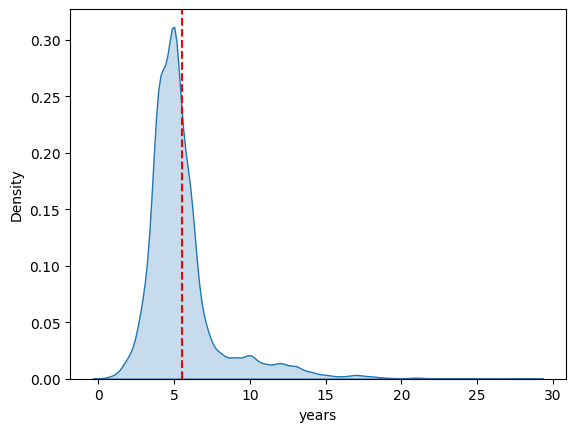

In [61]:
print('Avg age: ' + str(round(df.years.mean())) + ' years')
ax = sns.kdeplot(data=df, x='years', fill=True)
ax.axvline(x = df.years.mean(),
           ymin = 0,
           ymax = 1,
           linestyle = "dashed",
           color='red');

Avg horsepower: 129hp


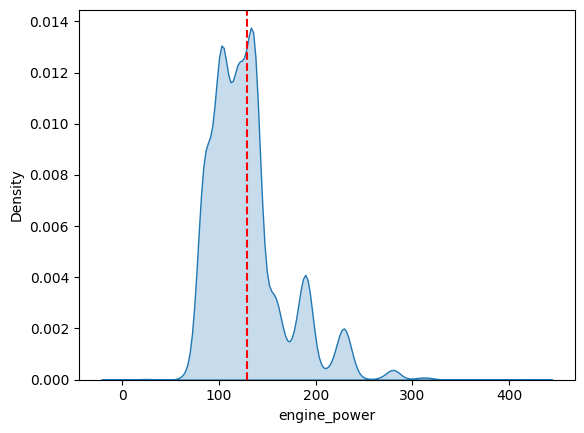

In [62]:
print('Avg horsepower: ' + str(round(df.engine_power.mean())) + 'hp')
ax = sns.kdeplot(data=df, x='engine_power', fill=True)
ax.axvline(x = df.engine_power.mean(),
           ymin = 0,
           ymax = 1,
           linestyle = "dashed",
           color='red');

## Влияют ли пробег и возраст авто на его цену?

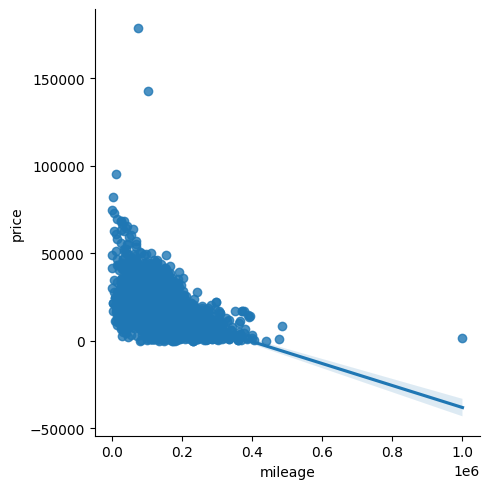

In [70]:
sns.lmplot(data=df, x='mileage', y='price');

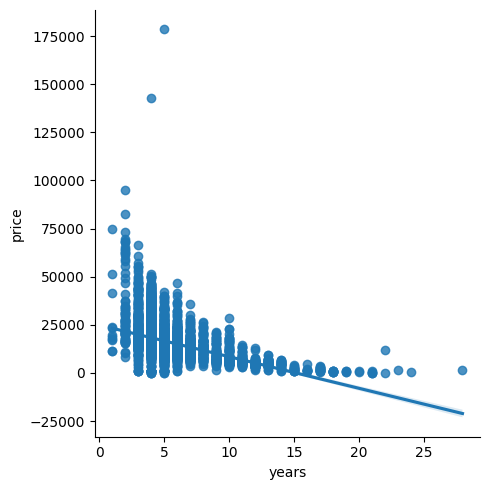

In [69]:
sns.lmplot(data=df, x='years', y='price');

### Пробег и возраст авто влияют на его цену

## Продают ли больше кабриолетов летом?

In [71]:
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,years,days,km_per_day
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,...,False,True,True,True,False,11300,2018-01-01,6,2161,64.975012
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,...,False,False,True,True,True,69700,2018-02-01,2,671,20.758569
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,...,False,True,False,True,False,10200,2018-02-01,6,2132,85.974203
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,...,False,True,True,True,True,25100,2018-02-01,4,1311,97.662090
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,...,False,False,True,True,True,33400,2018-04-01,4,1217,79.783895


In [74]:
df['sold_month'] = df.sold_at.apply(lambda x: x.month)

In [82]:
car_type_month = df.groupby(['sold_month', 'car_type']).maker_key.count().reset_index().copy()

In [90]:
car_type_month.rename(columns={'maker_key': 'count'}, inplace=True)

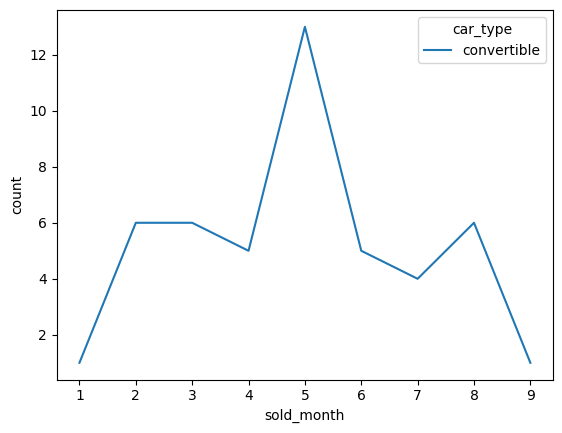

In [97]:
sns.lineplot(data=car_type_month.query('car_type == "convertible"'), x='sold_month', y='count', hue='car_type');

### Больше всего кабриолетов продают в мае, перед летним сезоном

## Становятся ли авто мощнее?

In [105]:
df['registration_year'] = df.registration_date.apply(lambda x: x.year)

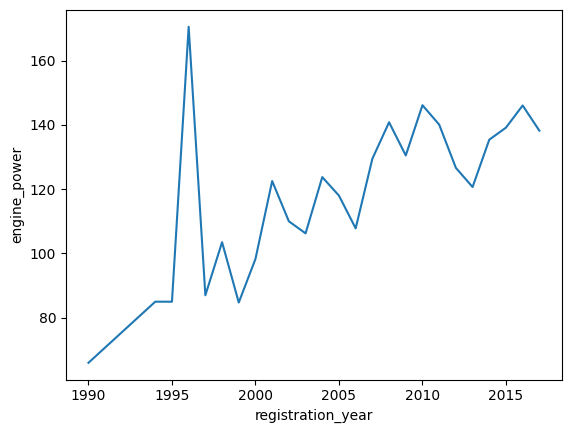

In [109]:
sns.lineplot(data=df.groupby('registration_year').engine_power.mean().reset_index(), x='registration_year', y='engine_power');

### Видно, что мощность авто растет

### Рассмотрим самые популярные модели

In [117]:
df.groupby('model_key').maker_key.count().reset_index().sort_values('maker_key', ascending=False)

,model_key,maker_key
21,320,752
39,520,633
19,318,569
65,X3,438
1,116,358
...,...,...
57,ActiveHybrid 5,1
54,735,1
49,635,1
48,630,1


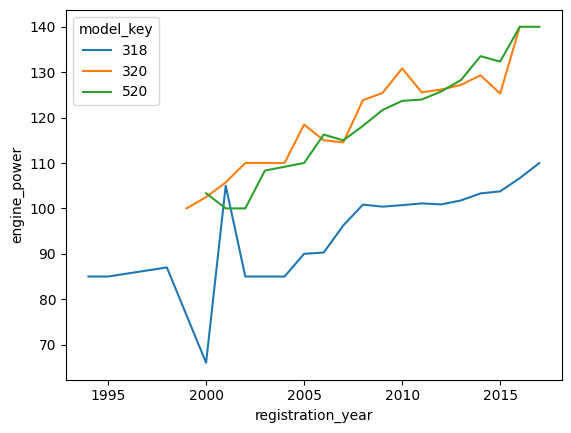

In [138]:
sns.lineplot(data=df.query('model_key == "320" or model_key == "520" or model_key == "318"').groupby(['registration_year', 'model_key']).engine_power.mean().reset_index(), x='registration_year', y='engine_power', hue='model_key');